In [49]:
import numpy as np

In [50]:
from posteriors import norm

# Normal distribution

In [51]:
mu1 = np.array([1,1, 1])
mu2 = np.array([10,10, 10])
sigma1 = np.array([[1,0, 0], [0,1, 0], [0,0,1]])
sigma2 = np.array([[10,0,0], [0,10,0], [0,0,10]])

mu = np.array([mu1, mu2])
sigma = np.array([sigma1, sigma2])

In [86]:
mu_start = np.zeros((2,3))
sigma_start = [30*np.eye(3), 30*np.eye(3)]
normal = norm(mu = mu_start , sigma = sigma_start,
              mu0 = mu_start, sigma0_inv = np.linalg.inv(sigma_start))

In [87]:
print(normal.params)

{'mu': array([[0., 0., 0.],
       [0., 0., 0.]]), 'sigma': [array([[30.,  0.,  0.],
       [ 0., 30.,  0.],
       [ 0.,  0., 30.]]), array([[30.,  0.,  0.],
       [ 0., 30.,  0.],
       [ 0.,  0., 30.]])]}


In [88]:
normal.default

{'mu0': array([[0., 0., 0.],
        [0., 0., 0.]]),
 'sigma0_inv': array([[[0.03333333, 0.        , 0.        ],
         [0.        , 0.03333333, 0.        ],
         [0.        , 0.        , 0.03333333]],
 
        [[0.03333333, 0.        , 0.        ],
         [0.        , 0.03333333, 0.        ],
         [0.        , 0.        , 0.03333333]]])}

In [89]:
from simulation import simul_gauss
from matplotlib import pyplot as plt
%matplotlib inline

import importlib, simulation
importlib.reload(simulation)

<module 'simulation' from '/home/nerk/Documents/3A_ENSAE/stat_bay/simulation.py'>

In [90]:
P = np.array([ [0.4,0.6],
             [0.8, 0.2]])

In [91]:
y, S = simul_gauss(P, mu, sigma, 1000)

In [92]:
y[:3], S[:3]

(array([[ 1.82904611, -0.21703238,  1.55860093],
        [ 1.62111094,  1.49131976, -0.21821008],
        [ 0.7528601 ,  2.10744873,  1.06137029]]), array([0, 0, 0]))

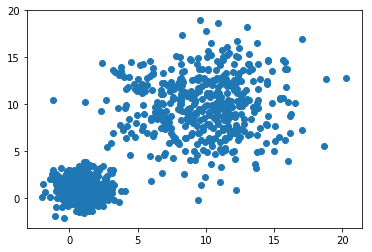

In [93]:
plt.scatter(y[:,0], y[:, 1])

In [94]:
y.mean(0), np.var(y, 0)

(array([4.86524976, 4.93080922, 4.98973416]),
 array([24.39829178, 24.93978821, 24.88445657]))

In [95]:
v = y[S==1]

In [96]:
u = v - v.mean(0)
u

array([[ 1.18081216, -3.98658754,  5.31489549],
       [ 0.63526864,  2.16042818,  0.80697656],
       [-0.44947454, -5.34297295,  0.90994052],
       ...,
       [ 2.27661226, -1.26411807,  2.95332451],
       [-0.65039292,  0.51216113, -1.11225957],
       [-5.08308655,  2.20925698,  3.59392486]])

In [97]:
np.var(u,0)

array([10.24740797, 10.45667158, 10.05230497])

In [98]:
u.transpose()@u/len(u)

array([[10.24740797,  0.14967305, -0.32384829],
       [ 0.14967305, 10.45667158,  0.79314735],
       [-0.32384829,  0.79314735, 10.05230497]])

## Update the model, given observations

In [99]:
np.round(np.cov(y, rowvar = False), 2)

array([[24.42, 19.62, 19.52],
       [19.62, 24.96, 20.16],
       [19.52, 20.16, 24.91]])

In [100]:
Theta = {"omega_inv": np.linalg.inv(sigma_start)} #Define the covariance's posterior attribute

In [101]:
normal.update(Y= y,S= S, Theta = Theta)

In [102]:
normal.default["mu0"]

array([[0., 0., 0.],
       [0., 0., 0.]])

In [103]:
normal.params

{'mu': array([[0.9640347 , 0.99152787, 1.03522859],
        [9.80595533, 9.91964193, 9.99766648]]),
 'sigma': array([[[0.05347594, 0.        , 0.        ],
         [0.        , 0.05347594, 0.        ],
         [0.        , 0.        , 0.05347594]],
 
        [[0.06802721, 0.        , 0.        ],
         [0.        , 0.06802721, 0.        ],
         [0.        , 0.        , 0.06802721]]])}